<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#
from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mutual_info_score, mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

In [3]:
# importing the dataset
df = pd.read_csv('house_prices_yaounde.csv')
# Viewing what the dataset looks like
df.head()

,bedrooms,bathrooms,parking,size_sqm,age,condition,year_built,renovation_year,location,floor_number,distance_to_city_center,proximity_to_schools,price
0,7.0,2.0,NaN,111.0,NaN,excellent,1985.0,1981.0,Bastos,3.0,4.714763,1.774572,30962.533609
1,4.0,3.0,0.0,271.0,40.0,good,1970.0,2011.0,Mvan,2.0,5.268401,3.664092,2733.858110
2,NaN,1.0,2.0,282.0,48.0,poor,2005.0,NaN,NaN,NaN,7.680354,2.696442,77878.500593
3,7.0,2.0,0.0,81.0,35.0,good,2018.0,NaN,Bastos,2.0,8.042010,NaN,44617.709958
4,3.0,NaN,0.0,68.0,28.0,fair,1975.0,NaN,Oyomabang,1.0,9.636422,NaN,45012.886096


In [4]:
# viewing dataset description for insights on the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,9000.0,4.016333,2.004179,1.000000,2.000000,4.000000,6.000000,7.000000
bathrooms,9000.0,1.991778,0.816228,1.000000,1.000000,2.000000,3.000000,3.000000
parking,9000.0,0.999889,0.813064,0.000000,0.000000,1.000000,2.000000,2.000000
size_sqm,9000.0,162.476222,78.619007,30.000000,93.750000,161.000000,232.000000,299.000000
age,9000.0,25.014000,14.239113,1.000000,12.000000,25.000000,38.000000,49.000000
year_built,9000.0,1986.446556,21.380124,1950.000000,1968.000000,1987.000000,2005.000000,2023.000000
renovation_year,2068.0,2000.099130,11.717582,1980.000000,1990.000000,2000.000000,2010.000000,2020.000000
floor_number,9000.0,2.488333,1.113055,1.000000,1.000000,2.000000,3.000000,4.000000
distance_to_city_center,9000.0,7.758767,4.189905,0.501885,4.077821,7.826268,11.411340,14.998074
proximity_to_schools,9000.0,2.548413,1.429546,0.100494,1.298501,2.561336,3.801121,4.998796


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 9000 non-null   float64
 1   bathrooms                9000 non-null   float64
 2   parking                  9000 non-null   float64
 3   size_sqm                 9000 non-null   float64
 4   age                      9000 non-null   float64
 5   condition                9000 non-null   object 
 6   year_built               9000 non-null   float64
 7   renovation_year          2068 non-null   float64
 8   location                 9000 non-null   object 
 9   floor_number             9000 non-null   float64
 10  distance_to_city_center  9000 non-null   float64
 11  proximity_to_schools     9000 non-null   float64
 12  price                    10000 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1015.8+ KB


In [6]:
# check for duplicates
df.duplicated().sum()

0

Text(0.5, 1.0, 'Quantifying missing data')

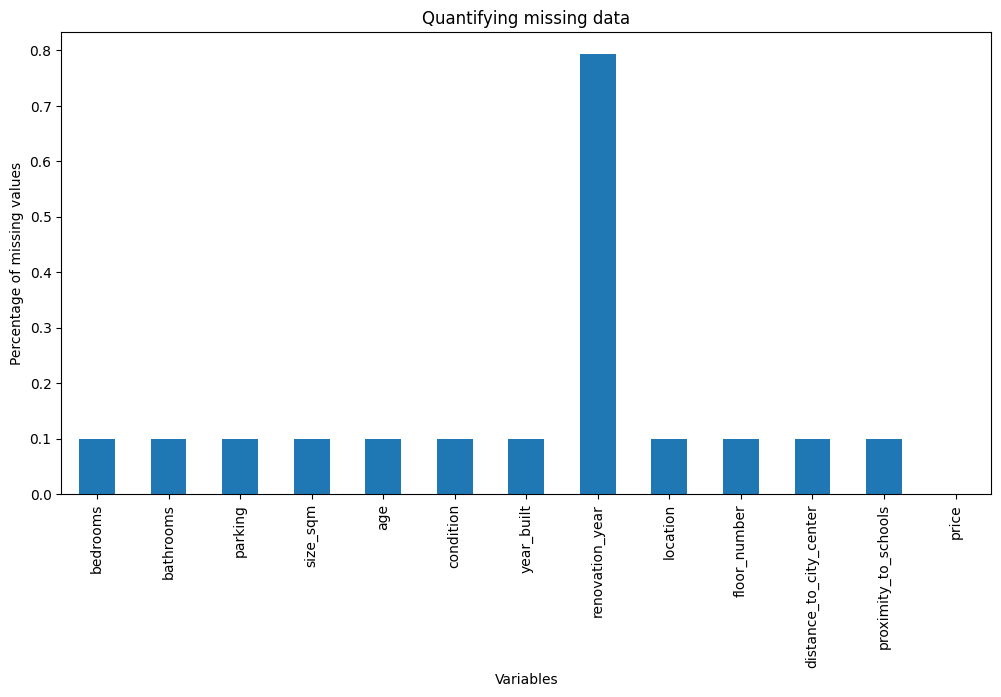

In [7]:
# visualize missing values per feature
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [8]:
# dropping feature with high null values
df.drop("renovation_year", inplace=True, axis=1)

<Axes: xlabel='price', ylabel='Count'>

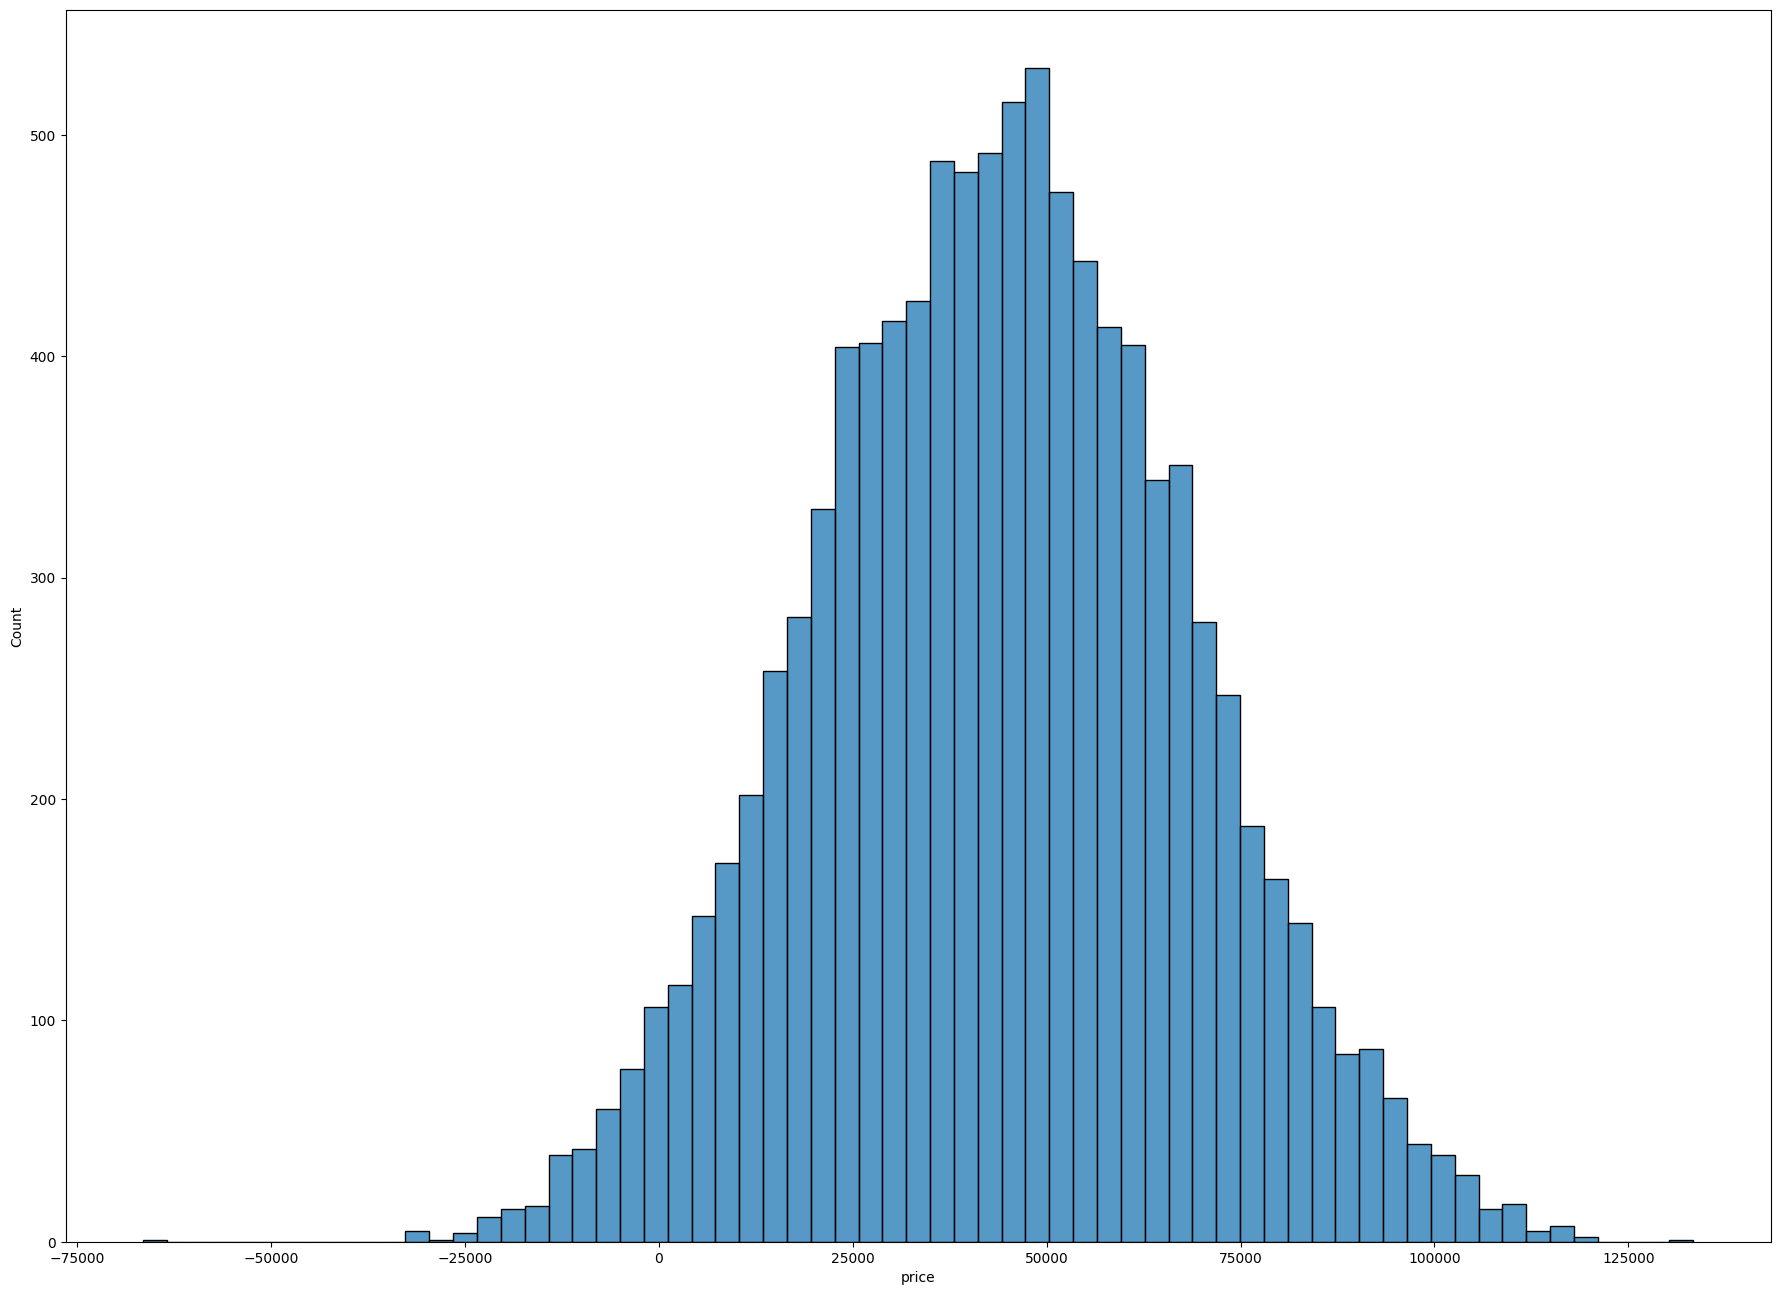

In [9]:
# distribution checking
plt.figure(figsize=(22, 16))
sns.histplot(df.price)

<Axes: xlabel='price', ylabel='Count'>

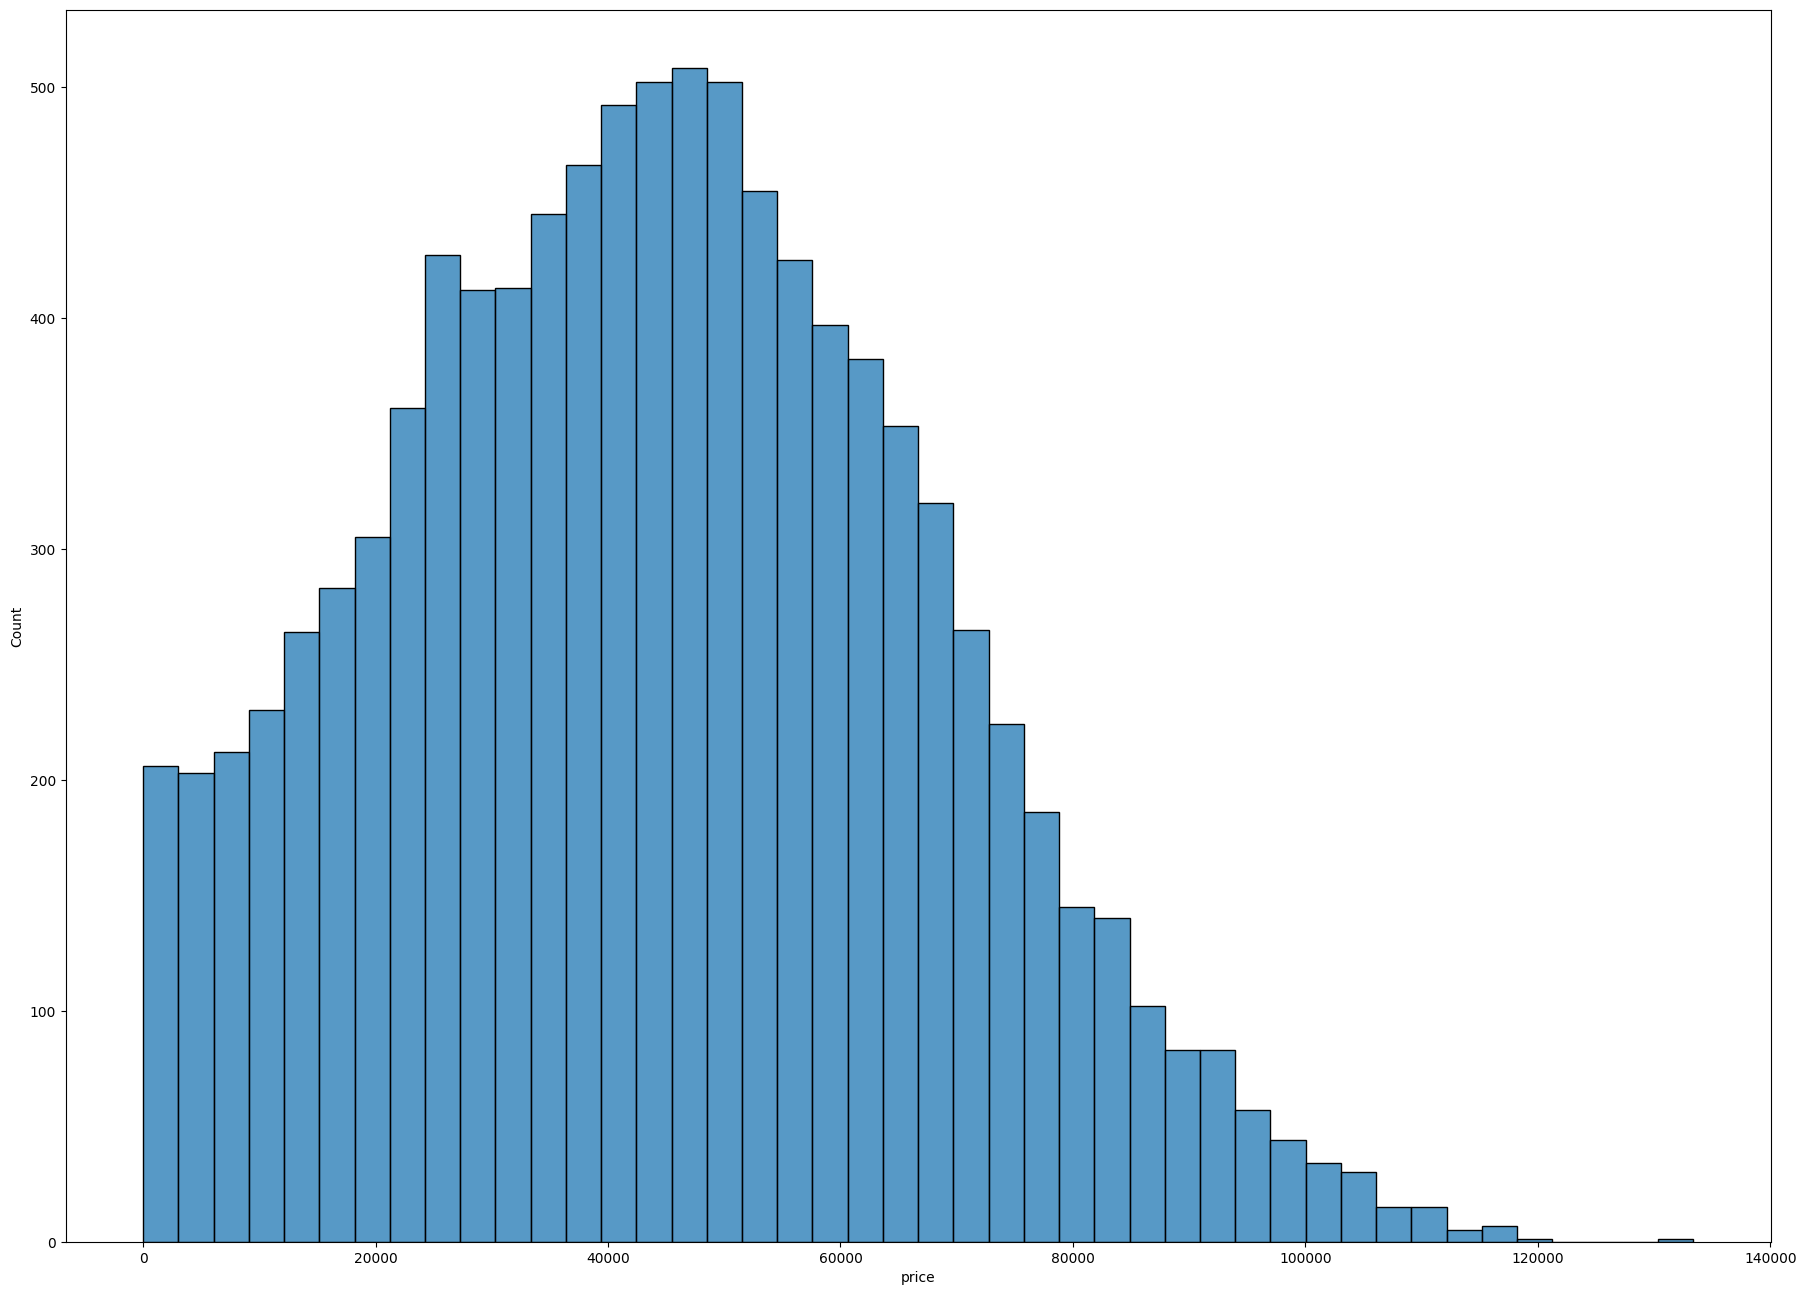

In [11]:
# dealing with negative price values
df['price'] = df['price'].abs()

# distribution checking
plt.figure(figsize=(22, 16))
sns.histplot(df.price)

In [12]:
X = df.drop("price", axis=1)
y = df['price']

In [13]:
cat_features = [col for col in X.columns if X[col].dtypes == "object" and X[col].nunique() < 10]
numeric_features = [col for col in X.columns if X[col].dtypes in ["int64", "float64"]]

In [14]:
# dealing with missing values
X[numeric_features] = IterativeImputer(estimator=DecisionTreeRegressor(random_state=1), max_iter=5).fit_transform(X[numeric_features])
X[cat_features] = SimpleImputer(strategy="most_frequent").fit_transform(X[cat_features])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [15]:
from IPython.display import display

def rates(X, y, columns):
    data = pd.concat([X, y], axis=1)
    global_mean = round(data["price"].mean(), 3)
    for col in columns:
        df_group = data.groupby(by=col).price.agg(["mean"])
        df_group["diff"] = df_group["mean"] - global_mean
        df_group["rate"] = df_group["mean"] / global_mean
        display(df_group)

In [16]:
rates(X, y, cat_features)

,mean,diff,rate
condition,,,
excellent,44534.847418,-124.046582,0.997222
fair,44767.348584,108.454584,1.002429
good,44631.352110,-27.541890,0.999383
poor,44687.703935,28.809935,1.000645


,mean,diff,rate
location,,,
Bastos,43771.541223,-887.352777,0.980130
Biyem-Assi,44793.131576,134.237576,1.003006
Emana,44500.869306,-158.024694,0.996462
Jovance,44925.860850,266.966850,1.005978
Mvan,45838.089436,1179.195436,1.026404
Nlongkak,44157.453099,-501.440901,0.988772
Obili,44533.899418,-124.994582,0.997201
Odza,44196.669596,-462.224404,0.989650
Oyomabang,45316.254069,657.360069,1.014720


In [17]:
def calculate_mi_score(X):
    return mutual_info_score(X, y)

In [18]:
# calculating mutual information which helps measures the dependency between a feature and the target variable. In this case the categorical features.
df_mi = pd.concat([X[cat_features],X[numeric_features]], axis=1).apply(calculate_mi_score)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="Mutual Information")
df_mi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

,Mutual Information
proximity_to_schools,9.067269
distance_to_city_center,9.067096
size_sqm,5.581864
year_built,4.300507
age,3.888755
location,2.161077
bedrooms,1.945588
floor_number,1.386054
condition,1.371691
parking,1.098605


# Results:
high values of mutual information implies location and condition have a strong relationship with the price

In [19]:
# checking and replacing the
df['condition'].unique()
mapping = {'excellent': 4, 'good': 3, 'poor': 2, 'fair': 1}
df['condition'] = df['condition'].map(mapping)

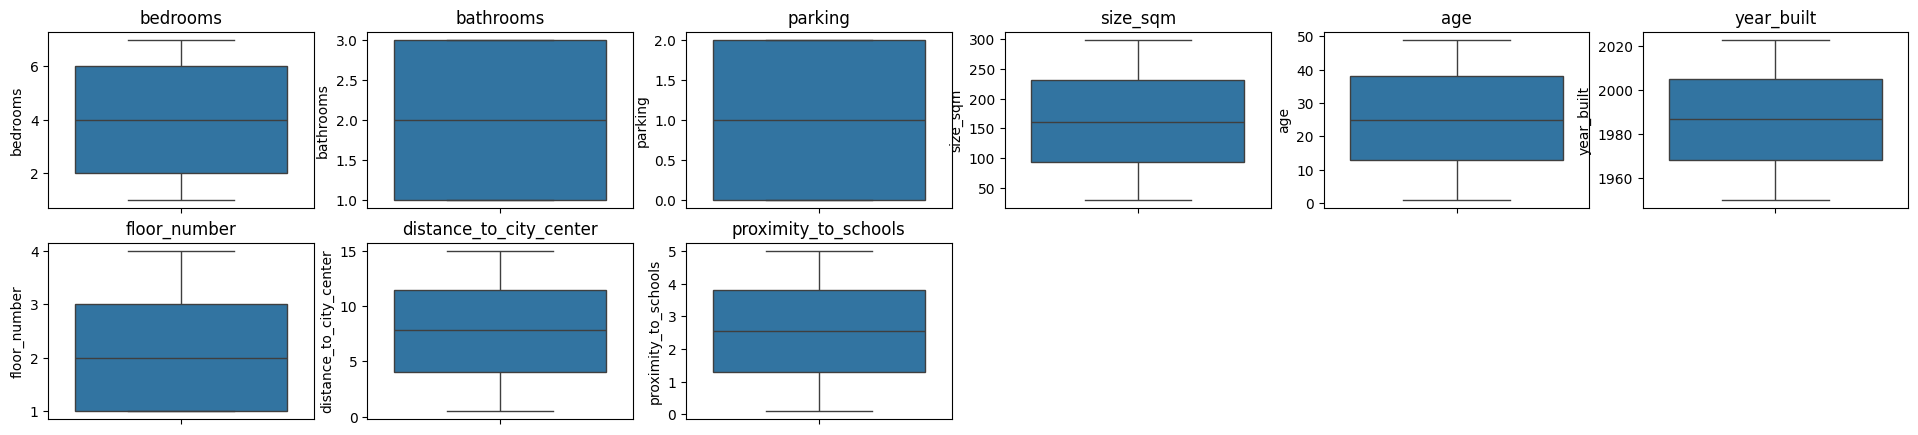

In [20]:
# identifying outliers
ind = 0
plt.figure(figsize=(24,16))
for i in X[numeric_features]:
    ind += 1
    plt.subplot(6,6,ind)
    plt.title(i)
    sns.boxplot(X[i])

In [21]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X[numeric_features]), columns=numeric_features)

<Axes: >

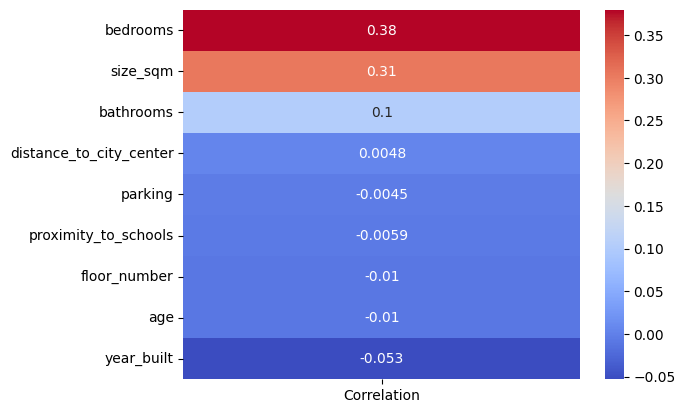

In [22]:
# output the correlation of the numerical features
def correlation(X, y):
    corr = X[numeric_features].corrwith(y).sort_values(ascending=False).to_frame("Correlation")
    return corr

sns.heatmap(correlation(X, y), cmap="coolwarm", annot=True)

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
numeric_pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('normalize', Normalizer())])
print()
categorical_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('ordinalEncoder', OrdinalEncoder()),('normalize', Normalizer())])
categorical_pipeline.fit_transform(X_train, y_train)


array([[4.01793397e-04, 0.00000000e+00, 8.03586795e-04, ...,
        0.00000000e+00, 4.33535076e-01, 9.00017210e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.43019721e-01, 5.37750726e-01],
       [8.29343472e-04, 2.07335868e-04, 2.07335868e-04, ...,
        4.14671736e-04, 2.37814241e-01, 9.70539198e-01],
       ...,
       [5.51217209e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.85714208e-01, 7.27331108e-01],
       [7.85618131e-03, 1.96404533e-03, 1.96404533e-03, ...,
        3.92809066e-03, 4.43874244e-01, 7.62049587e-01],
       [8.47274598e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.41212433e-04, 4.67413153e-01, 8.83848619e-01]])

In [ ]:
# define a column transformer
column_transformer = ColumnTransformer(transformers=[('numeric', numeric_pipeline, []), ('categorical', categorical_pipeline)], remainder='drop', n_jobs=1)

# Transforming the data
column_transformer.fit_transform(X_train, y_train)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
# define the model
model = LinearRegression()

In [ ]:
model_pipeline = Pipeline(steps=[('preprocessor', column_transformer), ('linearRegression', model)])
model.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


MAE: 16672.14190333877
MSE: 419764085.67270535
R-squared: 0.23624234448124704
